In [1]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("Dataset/brain+normal.csv")
df = shuffle(df, random_state=1).reset_index(drop=True)

df.head(5)

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,brain,astrocytoma,9.556081,5.526080,3.650048,5.056509,2.785774,6.570793,6.135645,3.029876,...,11.091654,10.993969,12.576917,12.313470,2.599384,2.440502,1.982966,1.797714,1.964544,2.370085
1,brain,ependymoma,12.643347,8.408933,7.893075,8.082575,4.091167,9.377509,6.116171,6.018412,...,13.289336,12.742540,14.198576,13.909929,5.403896,4.932116,3.942146,4.306064,4.841028,4.758554
2,normal,normal,8.523559,6.446557,6.110491,6.915887,2.375614,7.489329,4.136052,4.581049,...,12.085742,11.495483,13.630228,13.335569,8.594401,6.919923,7.472751,2.284780,2.585936,2.410203
3,brain,glioblastoma,12.180322,8.993027,8.008274,9.493953,4.454340,9.052279,6.331221,6.812413,...,11.998082,11.357289,13.492403,13.329294,5.252382,4.974248,4.039301,3.655452,4.483640,4.882925
4,normal,normal,11.196461,5.821402,5.456620,8.542700,3.245398,8.368442,6.583196,4.639983,...,12.833154,12.251775,14.016996,13.851353,10.713623,5.923269,8.745234,3.344703,3.553666,3.650059


In [2]:
def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert label to binary type:
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'brain': 1, 'normal': 0})
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y 

X,y = preprocessing(df)
display(X.head(5), X.shape)
display(y.head(5), y.shape)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,9.556081,5.526080,3.650048,5.056509,2.785774,6.570793,6.135645,3.029876,2.366091,3.169992,...,11.091654,10.993969,12.576917,12.313470,2.599384,2.440502,1.982966,1.797714,1.964544,2.370085
1,12.643347,8.408933,7.893075,8.082575,4.091167,9.377509,6.116171,6.018412,5.915260,6.227347,...,13.289336,12.742540,14.198576,13.909929,5.403896,4.932116,3.942146,4.306064,4.841028,4.758554
2,8.523559,6.446557,6.110491,6.915887,2.375614,7.489329,4.136052,4.581049,10.589157,3.765427,...,12.085742,11.495483,13.630228,13.335569,8.594401,6.919923,7.472751,2.284780,2.585936,2.410203
3,12.180322,8.993027,8.008274,9.493953,4.454340,9.052279,6.331221,6.812413,7.634342,5.272973,...,11.998082,11.357289,13.492403,13.329294,5.252382,4.974248,4.039301,3.655452,4.483640,4.882925
4,11.196461,5.821402,5.456620,8.542700,3.245398,8.368442,6.583196,4.639983,6.937847,3.650488,...,12.833154,12.251775,14.016996,13.851353,10.713623,5.923269,8.745234,3.344703,3.553666,3.650059


(278, 54675)

0    1
1    1
2    0
3    1
4    0
Name: cancer_type, dtype: int64

(278,)

In [3]:
# Method 1: Variance Threshold (Assume Features with higher variance => better)
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

threshold = 0.01
selector = VarianceThreshold(threshold=threshold)
X_var = selector.fit_transform(X)

selected_feature_indices = selector.get_support(indices=True)
X_var = X.columns[selected_feature_indices]
print(f"Number of selected features: {len(X_var)}")
print(f"Selected features: {X_var}")

Number of selected features: 54675
Selected features: Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)


In [4]:
# Method 2: Unvariate feature selection method (Based on their relation with output)
# ANOVA f-statistics

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 1000 features based on ANOVA F-statistic
k_best_selector = SelectKBest(score_func=f_classif, k=500)
X_anova = k_best_selector.fit_transform(X, y)

# Get selected feature names
X_anova = X.columns[k_best_selector.get_support()]

print(f"Selected features: {X_anova}")

Selected features: Index(['1552439_s_at', '1552518_s_at', '1553122_s_at', '1553268_at',
       '1553689_s_at', '1553720_a_at', '1553959_a_at', '1553998_at',
       '1554080_at', '1554153_a_at',
       ...
       '244403_at', '244703_x_at', '244708_at', '244740_at', '244819_x_at',
       '37892_at', '39248_at', '39966_at', '48808_at', '65493_at'],
      dtype='object', length=500)


In [5]:
# Method 3: Mutual Information methnod (Non-linear relationship between predictors and targets)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 100 features based on Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=500)
X_mut = mutual_info_selector.fit_transform(X, y) 

# Get selected feature names
X_mut = X.columns[mutual_info_selector.get_support()]

print(f"Selected features: {X_mut}")


Selected features: Index(['1552468_a_at', '1552503_at', '1552515_at', '1552564_at',
       '1552713_a_at', '1552852_a_at', '1552877_s_at', '1552960_at',
       '1552979_at', '1553207_at',
       ...
       '37020_at', '39966_at', 'AFFX-DapX-3_at', 'AFFX-DapX-5_at',
       'AFFX-DapX-M_at', 'AFFX-LysX-3_at', 'AFFX-PheX-M_at',
       'AFFX-r2-Bs-dap-3_at', 'AFFX-r2-Bs-phe-3_at', 'AFFX-ThrX-M_at'],
      dtype='object', length=500)


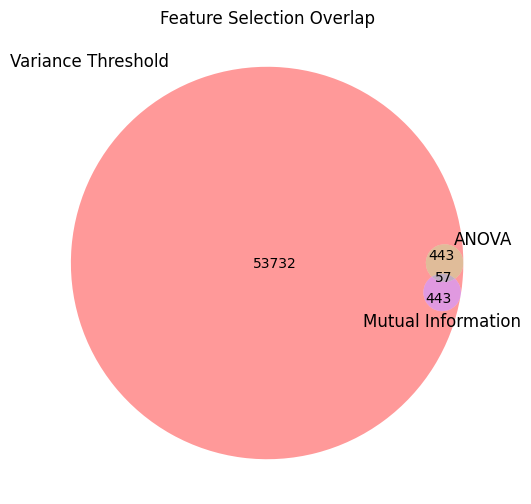

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3  

# Convert numpy arrays to flattened lists for compatibility
variance_features = set(X_var.ravel())
anova_features = set(X_anova.ravel())
mutual_info_features = set(X_mut.ravel())

# Create a Venn diagram to visualize the overlap
plt.figure(figsize=(8, 6))
venn_diagram = venn3(
    subsets=(
        len(variance_features - anova_features - mutual_info_features),  # Only Variance
        len(anova_features - variance_features - mutual_info_features),  # Only ANOVA
        len(variance_features & anova_features - mutual_info_features),  # Variance & ANOVA
        len(mutual_info_features - variance_features - anova_features),  # Only Mutual Info
        len(variance_features & mutual_info_features - anova_features),  # Variance & Mutual Info
        len(anova_features & mutual_info_features - variance_features),  # ANOVA & Mutual Info
        len(variance_features & anova_features & mutual_info_features),  # All 3 Methods
    ),
    set_labels=("Variance Threshold", "ANOVA", "Mutual Information"),
)
plt.title("Feature Selection Overlap")
plt.show()


In [7]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Perform feature_selection (ANOVA, Mutual Information, Reduce Overlap)
def feature_selection(X,y):
    # Perform ANOVA
    k_best_selector = SelectKBest(score_func=f_classif, k=500)
    X_anova = k_best_selector.fit_transform(X,y)
    X_anova = X.columns[k_best_selector.get_support()]
    
    # Perform Mutual Information
    mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=500)
    X_mut = mutual_info_selector.fit_transform(X,y)
    X_mut = X.columns[mutual_info_selector.get_support()]
    
    # # Reduce overlap
    # X_reduce = set(X_anova).difference(set(X_mut))
    # X_reduce = X[list(X_reduce)]
    
    # X_reduce = X_anova.intersection(X_mut)  # Features in both ANOVA and Mutual Information
    # X_reduce = X[list(X_reduce)]  # Subset of data with overlapping features
    
    combined_features = set(X_anova).union(set(X_mut)).union(set(X_var))
    X_reduce = X[list(combined_features)]  # Subset the data to include combined features
    
    return X_reduce

X = feature_selection(X,y)
display(X.head(5))

,213710_s_at,205137_x_at,232380_at,208119_s_at,211545_at,228332_s_at,221198_at,243779_at,211121_s_at,1556824_at,...,229683_s_at,215945_s_at,224563_at,244518_at,235388_at,1558937_s_at,230651_at,201412_at,1566903_at,220133_at
0,7.287570,4.529808,1.982755,5.890185,2.588576,10.623664,2.993924,5.544368,4.306138,3.747814,...,2.477682,7.336640,6.375150,1.823107,4.825138,3.833613,6.172199,7.842730,4.706900,2.058751
1,8.321853,6.688427,3.977298,6.888862,6.560454,10.982021,7.786743,5.615331,8.467095,7.000674,...,6.534304,9.772156,6.750810,5.342392,5.794413,6.860871,7.160835,11.429598,6.311937,5.578781
2,6.718628,5.442672,2.448124,6.355641,3.163719,10.099239,4.214922,3.162561,6.343606,4.786545,...,3.091369,6.294298,5.911147,2.445018,6.950301,6.482961,5.577999,9.333484,4.262755,3.609925
3,8.495093,7.215526,4.103611,7.654564,5.882514,11.355758,5.046568,5.292004,9.161231,7.208103,...,5.956374,8.143264,7.800196,5.362307,5.862531,7.176496,5.761513,11.733236,7.080405,5.493645
4,8.469755,10.205048,3.282063,6.304804,4.299444,11.464096,4.889009,3.680064,6.650419,6.529323,...,4.776193,7.678931,6.758020,3.722017,4.338000,4.241653,6.811022,11.725830,5.980042,3.769850


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

# Define Training Pipeline with Random Forest
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Adjust n_estimators as needed
])

# Define Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
accuracy_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, test_index in skf.split(X, y):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Append scores
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    
    # Print results for the current fold
    print(f"Fold {fold} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print("-" * 30)
    
    fold += 1

# Final summary of metrics
print("\nCross-Validation Summary:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.4f}")
print(f"Mean ROC AUC: {np.mean(roc_auc_scores):.4f}")


Fold 1 Results:
  Accuracy: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000
------------------------------
Fold 2 Results:
  Accuracy: 0.9821
  Recall: 1.0000
  F1 Score: 0.9825
  ROC AUC: 1.0000
------------------------------
Fold 3 Results:
  Accuracy: 0.9643
  Recall: 1.0000
  F1 Score: 0.9655
  ROC AUC: 0.9898
------------------------------
Fold 4 Results:
  Accuracy: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000
------------------------------
Fold 5 Results:
  Accuracy: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000
------------------------------

Cross-Validation Summary:
Mean Accuracy: 0.9893
Mean Recall: 1.0000
Mean F1 Score: 0.9896
Mean ROC AUC: 0.9980


In [9]:
# Final Train accuracy

# Print average metrics across folds
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")
print(f"Mean ROC-AUC: {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")


Cross-Validation Results:
Mean Accuracy: 0.99 ± 0.01
Mean Recall: 1.00 ± 0.00
Mean F1 Score: 0.99 ± 0.01
Mean ROC-AUC: 1.00 ± 0.00


In [10]:
import pandas as pd
from sklearn.utils import shuffle

# Load and shuffle the dataset
test_breast = pd.read_csv("Dataset/brain_test_data.csv")
X_test, y_test = preprocessing(test_breast)
X_test = X_test[X.columns]
display(X_test, y_test)

,213710_s_at,205137_x_at,232380_at,208119_s_at,211545_at,228332_s_at,221198_at,243779_at,211121_s_at,1556824_at,...,229683_s_at,215945_s_at,224563_at,244518_at,235388_at,1558937_s_at,230651_at,201412_at,1566903_at,220133_at
0,9.162039,7.308749,4.059560,7.888039,5.557629,11.630465,6.703813,4.619464,7.805253,7.346009,...,5.690123,8.678514,6.487800,5.483426,5.121286,7.292486,6.306852,10.729298,6.925063,6.076351
1,8.293118,6.055362,4.384060,6.989815,5.807919,11.050265,6.990988,4.905639,8.098224,6.717531,...,5.178632,9.407581,10.553699,4.993173,7.765337,6.141427,6.882173,11.571720,6.482593,4.789440
2,9.361826,6.605863,3.738974,7.376319,5.312107,11.830015,6.833965,5.849274,6.945981,7.191664,...,5.981942,10.047993,6.828490,4.786643,6.484462,5.682304,6.322076,9.673931,6.191607,5.597522
3,8.896389,7.799217,3.982728,8.007835,5.589116,11.501834,6.370530,4.670558,7.971494,6.742999,...,5.251052,10.037643,9.182483,4.835485,7.253448,7.308030,7.011981,10.951755,6.215221,5.520285
4,9.306310,6.039583,4.255391,8.517859,5.673243,11.034767,6.552751,5.795334,7.112075,7.256868,...,5.359473,9.700631,6.433242,5.664275,5.454613,6.925461,6.283540,10.289821,7.095037,5.878101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,8.348692,7.909219,4.561985,7.112701,6.007605,11.989649,6.127715,4.476899,6.977326,7.991831,...,6.129060,8.530331,7.746663,5.526233,4.840287,5.610489,7.628834,12.288878,7.243273,9.103671
63,9.717776,7.563727,4.917422,7.726204,5.600448,11.396366,6.266361,4.694214,6.614438,8.371601,...,6.141777,8.539390,7.106021,5.607257,5.303470,5.650333,7.169580,10.264687,7.216512,8.607215
64,5.248133,4.844204,2.969710,6.857049,3.974126,7.429815,3.520831,3.205050,5.153114,4.555247,...,3.530796,5.004804,3.678768,3.809075,2.237177,2.604035,5.788014,4.579917,4.845387,3.383381
65,5.099312,5.369723,2.583310,7.408019,4.260803,3.997443,3.114914,2.959267,5.043678,4.640307,...,3.492059,4.352712,3.864623,3.776005,2.298872,3.620220,4.178832,4.286105,5.105831,3.364206


0     1
1     1
2     0
3     1
4     0
     ..
62    0
63    0
64    0
65    0
66    0
Name: cancer_type, Length: 67, dtype: int64

In [11]:
# Predict using the final trained model
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print("\nFinal Model Evaluation on Test Dataset:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Final Model Evaluation on Test Dataset:
Accuracy: 0.99
Recall: 1.00
F1 Score: 0.97
ROC-AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.94      1.00      0.97        15

    accuracy                           0.99        67
   macro avg       0.97      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [12]:
import pandas as pd

# Create the report dataframe
report_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Probability (Brain)': y_pred_prob
})

# Save the report to the Dataset directory
output_path = "Dataset/test_set_prediction_report.csv"
report_df.to_csv(output_path, index=False)

print(f"Prediction report saved to {output_path}")


Prediction report saved to Dataset/test_set_prediction_report.csv


In [13]:
import pandas as pd

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract feature importances from RandomForestClassifier
feature_importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns

# Loop through samples predicted as cancer (y = 1)
for i, (pred, prob) in enumerate(zip(y_pred, y_pred_prob)):
    if pred == 1:  # Only consider predictions for class 1 (cancer)
        sample_features = X_test.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * feature_importances  # Calculate scaled contributions
        
        # Create a DataFrame for contributions
        contribution_df = pd.DataFrame({
            'Feature': feature_names,
            'Contribution': contributions
        }).sort_values(by='Contribution', ascending=False)  # Sort by contribution
        
        # Print details for the sample
        print(f"\nSample {i}: Predicted Probability (Cancer - Class 1): {prob:.4f}")
        print("Top Contributing Features for This Sample:")
        print(contribution_df.head(10))  # Display top 10 contributing features



Sample 0: Predicted Probability (Cancer - Class 1): 0.8900
Top Contributing Features for This Sample:
           Feature  Contribution
4164     212233_at      0.186898
40879  218899_s_at      0.172857
9660     239082_at      0.168412
49908  223313_s_at      0.131539
13313    221909_at      0.129196
730      205103_at      0.127211
45685    223642_at      0.105423
35407    227933_at      0.102371
15398    212909_at      0.099410
28738    235238_at      0.098321

Sample 1: Predicted Probability (Cancer - Class 1): 0.9800
Top Contributing Features for This Sample:
           Feature  Contribution
4164     212233_at      0.206487
730      205103_at      0.187422
40879  218899_s_at      0.186474
9660     239082_at      0.172854
35407    227933_at      0.167568
1563     244403_at      0.161089
49908  223313_s_at      0.148444
13313    221909_at      0.141262
28738    235238_at      0.129899
45685    223642_at      0.120553

Sample 3: Predicted Probability (Cancer - Class 1): 0.9700
Top Cont

In [15]:
# Save model

import joblib
joblib.dump(pipeline, 'brain.joblib')

['brain.joblib']